In [31]:
!git config --global user.name "Erum-Hub"
!git config --global user.email "e_farooqi@gmail.com"

In [32]:
# Clone the GitHub repository
!git clone https://github.com/Erum-hub/LHL_LLM.git

# Change directory to the cloned repository
%cd LHL_LLM

fatal: destination path 'LHL_LLM' already exists and is not an empty directory.
/content/LHL_LLM/LHL_LLM


In [33]:
# imports

from datasets import load_dataset, Dataset, DatasetDict
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
import string
import os
import re

In [34]:
from google.colab import files
uploaded = files.upload()


Saving Customer_Reviews.csv to Customer_Reviews.csv


In [35]:
!mv Customer_Reviews.csv /content/LHL_LLM/

In [36]:
%cd /content/LHL_LLM
!git add Customer_Reviews.csv
!git commit -m "Add Customer_Reviews.csv"
!git push origin main  # or your branch name


/content/LHL_LLM
On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Customer_Reviews (1).csv
	LHL_LLM/

nothing added to commit but untracked files present (use "git add" to track)
fatal: could not read Username for 'https://github.com': No such device or address


In [37]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [38]:
import pandas as pd
import re

In [39]:
# Creating a directory to save data as csv

current_dir = os.getcwd()
main_dir = os.path.abspath(os.path.join(current_dir, '..'))
data_dir = os.path.abspath(os.path.join(main_dir, 'data'))
os.makedirs(data_dir, exist_ok=True)

In [40]:
# Load dataset
df = pd.read_csv('/content/LHL_LLM/Customer_Reviews.csv')

In [41]:
# Inspect
print(df.head())

   Unnamed: 0                                          book name  \
0          17  Friends, Lovers, and the Big Terrible Thing: A...   
1         131                      Lessons in Chemistry: A Novel   
2         464                           Flash Cards: Sight Words   
3         644  A Court of Mist and Fury (A Court of Thorns an...   
4          78  The Ballad of Songbirds and Snakes (A Hunger G...   

                                        review title          reviewer  \
0                                    A very sad read  Veronica R Ewing   
1                    I LOVE THIS BOOK!! 😍 ⭐️⭐️⭐️⭐️⭐️             Sonia   
2                     Amazing for struggling readers     Ryan Williams   
3  The ending was stunning, as always, but I had ...          Brittany   
4                                         So Good!!!   Kindle Customer   

   reviewer rating                                 review description  \
0                4  What a shock to lose such a talented and funny...   


In [42]:
# Count unique values in the 'review title' column
unique_count = df['review title'].nunique()
print(f"Number of unique review titles: {unique_count}")

Number of unique review titles: 819


In [43]:
top_titles = df['review title'].value_counts().head(10)
print(top_titles)


review title
Great book     14
Cute book      10
Book            6
Cute            5
Love it         4
Great book!     4
Great           4
Perfect         3
Loved it!       3
Love            3
Name: count, dtype: int64


In [44]:
top_title_list = top_titles.index.tolist()
df['title_group'] = df['review title'].apply(lambda x: x if x in top_title_list else 'Other')


In [45]:
# Combine review title and description
df['text'] = df['review title'].fillna('') + '. ' + df['review description'].fillna('')

# Clean text
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", str(text))
    return text.lower().strip()

df['clean_text'] = df['text'].apply(clean_text)


In [46]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords')

# Define stopword set
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

# Apply to cleaned text
df['clean_text_nostop'] = df['clean_text'].apply(remove_stopwords)

# Rename the column
df = df.rename(columns={'clean_text_nostop': 'sentiment'})



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
# Keep only the last occurrence of 'sentiment'
df = df.loc[:, ~df.columns.duplicated(keep='last')]


In [48]:
# prompt: show headers

df.columns

Index(['Unnamed: 0', 'book name', 'review title', 'reviewer',
       'reviewer rating', 'review description', 'is_verified', 'date',
       'timestamp', 'ASIN', 'Author', 'title_group', 'text', 'clean_text',
       'sentiment'],
      dtype='object')

In [49]:
df[['sentiment', 'reviewer rating']].dropna().to_csv('cleaned_reviews.csv', index=False)


In [50]:
# Define labeling function
def classify_sentiment(text):
    text = text.lower()
    if any(word in text for word in ['excellent', 'great', 'love', 'amazing', 'perfect', 'recommend', 'good']):
        return 'recommended'
    elif any(word in text for word in ['bad', 'poor', 'terrible', 'worst', 'disappointed', 'not recommend']):
        return 'not recommended'
    else:
        return 'neutral'

# Apply function to sentiment column
df['label'] = df['sentiment'].apply(classify_sentiment)


In [51]:
# prompt: Using dataframe df: convert in csv

df.to_csv("df.csv")

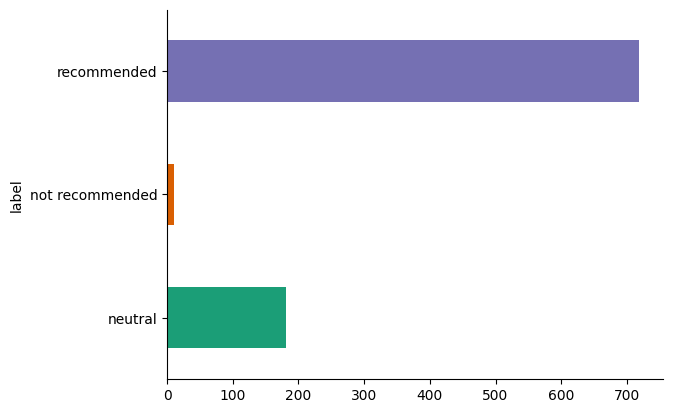

In [52]:
 #@title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Dataset has many more examples of recommended than others. Class imbalance problem.

/tmp/ipython-input-53-3740740557.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='reviewer rating', y='label', inner='box', palette='Dark2')


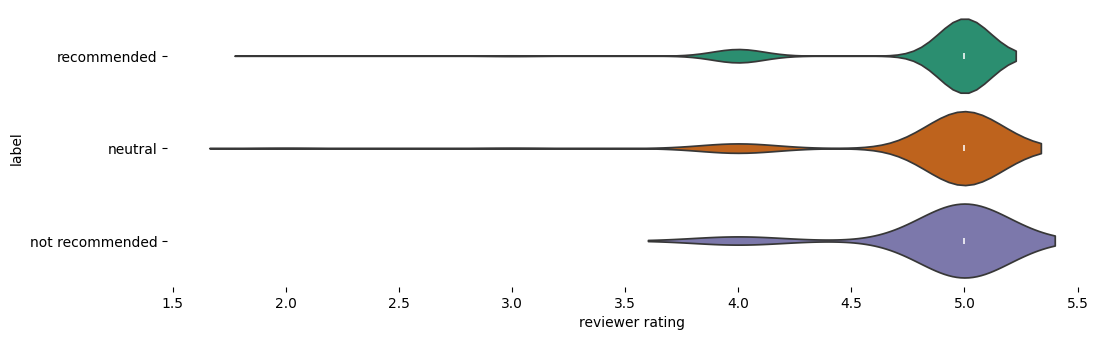

In [53]:
# @title label vs reviewer rating

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='reviewer rating', y='label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

reviewer ratings (e.g., stars or numeric scores) does'nt  seem to align with the sentiment expressed in the review text.

In [54]:
# Assuming labels are already mapped as:
# 0 → recommended
# 1 → not recommended
# 2 → neutral
recommended = df[df['label'] == 'recommended']
not_recommended = df[df['label'] == 'not recommended']
neutral = df[df['label'] == 'neutral']

In [55]:
print("Class distribution:")
print(df['label'].value_counts())


Class distribution:
label
recommended        719
neutral            181
not recommended     10
Name: count, dtype: int64


In [56]:
from sklearn.utils import resample

# Find the majority class size
max_size = max(len(recommended), len(not_recommended), len(neutral))

# Upsample each class to match the majority size
recommended_upsampled = resample(recommended, replace=True, n_samples=max_size, random_state=42)
not_recommended_upsampled = resample(not_recommended, replace=True, n_samples=max_size, random_state=42)
neutral_upsampled = resample(neutral, replace=True, n_samples=max_size, random_state=42)

# Combine into a balanced dataset
df_balanced = pd.concat([recommended_upsampled, not_recommended_upsampled, neutral_upsampled])


In [57]:
from sklearn.utils import shuffle
df_balanced = shuffle(df_balanced, random_state=42).reset_index(drop=True)


In [58]:
# from sklearn.utils import resample

# # Separate classes
# majority = df[df['label'] == 'recommended']
# minority = df[df['label'] != 'recommended']

# # Downsample majority
# majority_downsampled = resample(majority,
#                                 replace=False,
#                                 n_samples=len(minority),
#                                 random_state=42)
# neutral_upsampled = resample(
#     neutral,
#     replace=True,
#     n_samples=len(recommended),
#     random_state=42
# )

# df_balanced = pd.concat([recommended, not_recommended_upsampled, neutral_upsampled])



In [ ]:
# prompt: suggest bar chart

sentiment_counts = df_balanced['label'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiment Labels (Balanced Dataset)')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# # train test split
# from sklearn.model_selection import train_test_split

# X = df_balanced['sentiment']
# y = df_balanced['label']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
)


Can delete this below

In [ ]:
print(df['label'].value_counts())
print("Unique labels:", sorted(df['label'].unique()))


In [ ]:
label_map = {
    'recommended': 0,
    'not recommended': 1,
    'neutral': 2
}

df = df[df['label'].isin(label_map.keys())]  # Filter out any unexpected labels
df['label'] = df['label'].map(label_map)


2-Representation -Tokenization

In [ ]:
import pandas as pd
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
import torch

# Load cleaned data
df = pd.read_csv('df.csv')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['sentiment'], df['label'], test_size=0.2, random_state=42)

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(list(X_train), truncation=True, padding=True, return_tensors="pt")
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, return_tensors="pt")

In [ ]:
import torch

# Load the saved data
train_encodings, train_labels = torch.load('train_data.pt', weights_only=False)
test_encodings, test_labels = torch.load('test_data.pt', weights_only=False)


# Inspect the keys and shapes
print("Train Encodings Keys:", train_encodings.keys())
print("Train Input IDs Shape:", train_encodings['input_ids'].shape)
print("Train Attention Mask Shape:", train_encodings['attention_mask'].shape)
print("Train Labels Shape:", train_labels.shape)

print("\nTest Input IDs Shape:", test_encodings['input_ids'].shape)
print("Test Labels Shape:", test_labels.shape)



3- Pretrained_Model

In [ ]:
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModelForSequenceClassification
from torch.optim import AdamW

class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': self.labels[idx]
        }
    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_labels)
test_dataset = ReviewDataset(test_encodings, test_labels)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4)

# Load model for 3 classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
model.to(device)
optimizer = AdamW(model.parameters(), lr=5e-5)



In [ ]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torch.optim import AdamW
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# from sklearn.metrics import classification_report
# from tqdm import tqdm

# # Set device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Load tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
# model.to(device)

# # Load preprocessed data
# train_encodings, train_labels = torch.load('train_data.pt', weights_only=False)
# test_encodings, test_labels = torch.load('test_data.pt', weights_only=False)

# # Dataset class
# class ReviewDataset(Dataset):
#     def __init__(self, encodings, labels):
#         self.encodings = encodings
#         self.labels = labels
#     def __getitem__(self, idx):
#         return {
#             'input_ids': self.encodings['input_ids'][idx],
#             'attention_mask': self.encodings['attention_mask'][idx],
#             'labels': self.labels[idx]
#         }
#     def __len__(self):
#         return len(self.labels)

# # Create datasets and loaders
# train_dataset = ReviewDataset(train_encodings, train_labels)
# test_dataset = ReviewDataset(test_encodings, test_labels)

# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=8)

# # Optimizer
# optimizer = AdamW(model.parameters(), lr=5e-5)

# # Training loop
# epochs = 3
# for epoch in range(epochs):
#     model.train()
#     total_loss = 0
#     loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=True)

#     for batch in loop:
#         optimizer.zero_grad()
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         labels = batch['labels'].to(device)

#         outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()
#         loop.set_postfix(loss=loss.item())

#         del input_ids, attention_mask, labels, outputs
#         torch.cuda.empty_cache()

#     avg_loss = total_loss / len(train_loader)
#     print(f"✅ Epoch {epoch+1} completed — Average Loss: {avg_loss:.4f}")

# # Save the final model
# model.save_pretrained("sentiment_model")
# tokenizer.save_pretrained("sentiment_model")

# # Evaluation
# model.eval()
# predictions, true_labels = [], []

# with torch.no_grad():
#     for batch in test_loader:
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         labels = batch['labels'].to(device)

#         outputs = model(input_ids, attention_mask=attention_mask)
#         preds = torch.argmax(outputs.logits, dim=1)

#         predictions.extend(preds.cpu().numpy())
#         true_labels.extend(labels.cpu().numpy())

# print("\n📊 Classification Report:")
# print(classification_report(true_labels, predictions, target_names=["recommended", "not recommended", "neutral"]))




In [ ]:
from tqdm import tqdm

for epoch in range(3):
    total_loss = 0
    model.train()
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

        del input_ids, attention_mask, labels, outputs
        torch.cuda.empty_cache()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} - Average Loss: {avg_loss:.4f}")


# 4. **Optimization**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from sklearn.metrics import accuracy_score
from transformers import AutoModelForSequenceClassification


In [ ]:

# Set random seed for reproducibility
torch.manual_seed(42)


In [ ]:

# Load data (ensure weights_only=False for PyTorch 2.6+)
train_encodings, train_labels = torch.load('train_data.pt', weights_only=False)
test_encodings, test_labels = torch.load('test_data.pt', weights_only=False)


In [ ]:
# Dataset class
class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': self.labels[idx]
        }
    def __len__(self):
        return len(self.labels)



In [ ]:
# Create datasets and loaders
train_dataset = ReviewDataset(train_encodings, train_labels)
test_dataset = ReviewDataset(test_encodings, test_labels)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)



In [ ]:
# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)



In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import AdamW
from sklearn.metrics import accuracy_score

# Load tokenized data (make sure you saved it with weights_only=False)
train_encodings, train_labels = torch.load('train_data.pt', weights_only=False)
test_encodings, test_labels = torch.load('test_data.pt', weights_only=False)

# Define custom dataset
class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': self.labels[idx]
        }
    def __len__(self):
        return len(self.labels)

# Create dataset objects
train_dataset = ReviewDataset(train_encodings, train_labels)
test_dataset = ReviewDataset(test_encodings, test_labels)

# ✅ Reduce batch size to avoid memory issues
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4)

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)


In [ ]:
# Evaluation
model.eval()
preds, true_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=-1)
        preds.extend(predictions.cpu().numpy())
        true_labels.extend

## 5. ***deployment***

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Load trained weights if saved
# model.load_state_dict(torch.load("model.pt"))  # Optional

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
